In [341]:
first_cost = 50       # 一志愿成本
second_cost = 20      # 二志愿成本
third_cost = 1        # 三志愿成本

total_student = 200   # 对课程感兴趣的学生总人数
max_student = 50      # 课程的最大课容量
average_reward = 3   # 课程的平均奖励

In [342]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一个长度为total_student的随机数组，每个元素为以average_reward为中心的正态分布
rewards = np.random.normal(average_reward, 26, total_student)

print(rewards)

[-70.47079768  29.12318568 -43.9076655  -25.82131589  -2.56487786
  -7.61254092  16.5464737  -12.92964351  19.69071042   2.61465743
  21.12292197   6.48853854  51.41176497   8.40689631  20.66993854
  19.54688786  -2.28192293  -2.04282529 -29.84328221 -29.87828589
  -6.70324341  13.6453306   15.34521807  -8.55253523  -7.19042749
 -29.45533441   4.90010904  -0.48409552 -14.47007734  20.23076672
   8.93676515  17.91662884   0.4651339   33.34420157   9.36941068
  -6.01682175 -14.85374972 -54.1718597   23.95330111 -12.72756001
 -35.9094717   15.68512908  12.99629109  15.73455139  26.24784241
  -9.95559221  15.49746273  13.43061683  -3.31658375  -9.62343584
 -15.28736207 -22.98510854 -14.6812513   26.04052755  -4.45411402
  15.11730548   7.04072041   8.15109857 -14.99040365  -6.72922529
  11.32046097  32.78425835  24.03886739 -28.02937618 -19.73568653
   7.71122358 -49.84875982   0.96081043  45.31670891  -4.19151846
   4.88292512  -8.99232144  27.71024656 -30.38741757  14.88207161
  -2.35724

In [343]:
first_student = 0
second_student = 0
third_student = 0

first_student_change = 0
second_student_change = 0
third_student_change = 0

# 定义生成一个长度为total_student的数组，每个元素初始值为0
choices = np.zeros(total_student)
# 0代表学生没有投放志愿，1代表一志愿，2代表二志愿，3代表三志愿

print(choices)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [344]:
# 计算投放不同志愿的中签概率
def calculate_probability_first(first_student, second_student, third_student):
    if first_student+1 <= max_student:
        return 1
    else:
        return max_student/(first_student+1)
    
def calculate_probability_second(first_student, second_student, third_student):
    if first_student >= max_student:
        return 0
    elif (first_student+second_student+1) <= max_student:
        return 1
    else:
        return (max_student-first_student)/(second_student+1)
    
def calculate_probability_third(first_student, second_student, third_student):
    if (first_student + second_student) >= max_student:
        return 0
    elif (first_student+second_student+third_student+1) <= max_student:
        return 1
    else:
        return (max_student-first_student-second_student)/(third_student+1)


# 考虑中签概率和成本，计算实际净收益
def calculate_first_reward(reward, first_student, second_student, third_student):
    # print('Possibility of first choice: ', calculate_probability_first(first_student, second_student, third_student))
    # print('Reward of first choice: ', reward*calculate_probability_first(first_student, second_student, third_student) - first_cost)
    return reward*calculate_probability_first(first_student, second_student, third_student) - first_cost

def calculate_second_reward(reward, first_student, second_student, third_student):
    return reward*calculate_probability_second(first_student, second_student, third_student) - second_cost

def calculate_third_reward(reward, first_student, second_student, third_student):
    return reward*calculate_probability_third(first_student, second_student, third_student) - third_cost

# 定义3个数组，长度为0，分别记录一志愿、二志愿、三志愿的投放数量
first_record = np.ndarray([])
second_record = np.ndarray([])
third_record = np.ndarray([])

for j in range(5):

    # 计算每个学生的净收益，并选择最优志愿
    for i in range(total_student):
        first_reward = calculate_first_reward(rewards[i], first_student, second_student, third_student)
        second_reward = calculate_second_reward(rewards[i], first_student, second_student, third_student)
        third_reward = calculate_third_reward(rewards[i], first_student, second_student, third_student)
        # print('First reward: ', first_reward, 'Second reward: ', second_reward, 'Third reward: ', third_reward)
        if first_reward >= second_reward and first_reward >= third_reward and first_reward >= 0: # 如果一志愿的净收益最高且为正，则选择一志愿
            if choices[i] != 0:
                if choices[i]==1:
                    first_student_change -= 1
                elif choices[i]==2:
                    second_student_change -= 1
                elif choices[i]==3:
                    third_student_change -= 1
            choices[i] = 1
            first_student_change += 1
        elif second_reward >= first_reward and second_reward >= third_reward and second_reward >= 0: # 如果二志愿的净收益最高且为正，则选择二志愿
            if choices[i] != 0:
                if choices[i]==1:
                    first_student_change -= 1
                elif choices[i]==2:
                    second_student_change -= 1
                elif choices[i]==3:
                    third_student_change -= 1
            choices[i] = 2
            second_student_change += 1
        elif third_reward >= first_reward and third_reward >= second_reward and third_reward >= 0: # 如果三志愿的净收益最高且为正，则选择三志愿
            if choices[i] != 0:
                if choices[i]==1:
                    first_student_change -= 1
                elif choices[i]==2:
                    second_student_change -= 1
                elif choices[i]==3:
                    third_student_change -= 1
            choices[i] = 3
            third_student_change += 1
        elif first_reward < 0 and second_reward < 0 and third_reward < 0: # 如果三个志愿的净收益都为负，则选择0
            if choices[i] != 0:
                if choices[i]==1:
                    first_student_change -= 1
                elif choices[i]==2:
                    second_student_change -= 1
                elif choices[i]==3:
                    third_student_change -= 1
            choices[i] = 0

        first_student += first_student_change
        second_student += second_student_change
        third_student += third_student_change
        first_student_change = 0
        second_student_change = 0
        third_student_change = 0

        if i%20 == 0:
            # 向first_record中添加数据
            first_record = np.append(first_record, first_student, axis=None)
            second_record = np.append(second_record, second_student, axis=None)
            third_record = np.append(third_record, third_student, axis=None)
            # print(first_student, second_student, third_student)
            print(first_record, second_record, third_record)

[0. 0.] [3. 0.] [-0.  0.]
[0. 0. 0.] [3. 0. 0.] [-0.  0. 10.]
[0. 0. 0. 0.] [3. 0. 0. 0.] [-0.  0. 10. 19.]
[0. 0. 0. 0. 0.] [3. 0. 0. 0. 0.] [-0.  0. 10. 19. 30.]
[0. 0. 0. 0. 0. 0.] [3. 0. 0. 0. 0. 0.] [-0.  0. 10. 19. 30. 38.]
[0. 0. 0. 0. 0. 0. 0.] [3. 0. 0. 0. 0. 0. 0.] [-0.  0. 10. 19. 30. 38. 47.]
[0. 0. 0. 0. 0. 0. 0. 0.] [3. 0. 0. 0. 0. 0. 0. 0.] [-0.  0. 10. 19. 30. 38. 47. 54.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.] [3. 0. 0. 0. 0. 0. 0. 0. 0.] [-0.  0. 10. 19. 30. 38. 47. 54. 64.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [3. 0. 0. 0. 0. 0. 0. 0. 0. 1.] [-0.  0. 10. 19. 30. 38. 47. 54. 64. 73.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [3. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2.] [-0.  0. 10. 19. 30. 38. 47. 54. 64. 73. 82.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [3. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 3.] [-0.  0. 10. 19. 30. 38. 47. 54. 64. 73. 82. 91.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [3. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 3. 4.] [-0.  0. 10. 19. 30. 38. 47. 54. 64. 73. 82. 91. 90.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
51
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51]


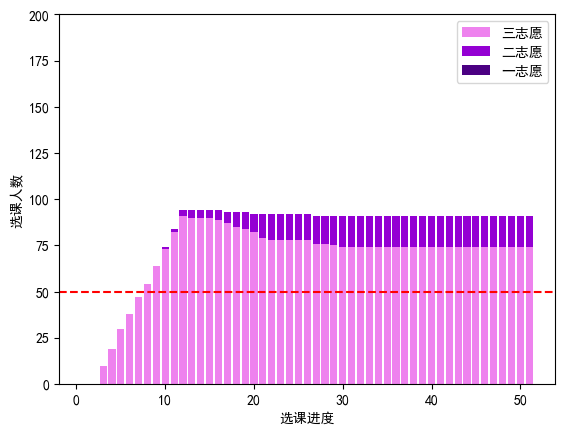

In [345]:
# 导入第三方数据库
import matplotlib as mpl
import matplotlib.pyplot as plt

# 字体与负号参数配置
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

# 创建数组x，长度与first_record相同，元素从1开始增加
print(first_record)
length = first_record.size
print(length)
x = np.arange(1, first_record.size+1)
print(x)

# 强制调整一下数据
first_record[0] = 0
second_record[0] = 0
third_record[0] = 0

# 绘制图形
plt.bar(x,third_record,color='violet',label='三志愿')
plt.bar(x,second_record,color='darkviolet',bottom=third_record,label='二志愿')
plt.bar(x,first_record,color='indigo',bottom=second_record+third_record,label='一志愿')

# 画一条红色横线，高度为课容量
plt.axhline(y=max_student, color='r', linestyle='--')

# plt.xlim(0, 55)  # X 轴的范围
plt.ylim(0, 200)  # Y 轴的范围

# 设置x,y轴标签
plt.xlabel('选课进度')
plt.ylabel('选课人数')

# 显示图例
plt.legend()

# 展示图形
plt.show()